In [0]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

In [0]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [0]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

In [1]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

NameError: ignored

In [0]:
image_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1./255),rotation_range=45,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.3,horizontal_flip=True)
train_gen=image_gen.flow_from_directory(batch_size=100,directory=train_dir,target_size=(150,150),class_mode='sparse')

Found 2935 images belonging to 5 classes.


In [0]:
image_gen1=tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1./255))
val_gen=image_gen.flow_from_directory(batch_size=100,directory=val_dir,target_size=(150,150),class_mode='sparse')

Found 735 images belonging to 5 classes.


In [0]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense

In [0]:
model = tf.keras.Sequential()

model.add(Conv2D(16, 3, padding='same', activation=tf.nn.relu, input_shape=(150,150,3)))
model.add(MaxPooling2D((2, 2),strides=2))

model.add(Conv2D(32, 3, padding='same', activation=tf.nn.relu))
model.add(MaxPooling2D((2, 2),strides=2))

model.add(Conv2D(64, 3, padding='same', activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(5,activation=tf.nn.softmax))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 18, 18, 64)        0

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
train_gen.n

2935

In [0]:
h=model.fit(train_gen,epochs=5,validation_data=val_gen,steps_per_epoch=int(np.ceil(train_gen.n/100)),validation_steps=int(np.ceil(val_gen.n/100)))

Epoch 1/5
30/30 [==============================] - 27s 898ms/step - loss: 1.5276 - accuracy: 0.3227 - val_loss: 1.3261 - val_accuracy: 0.4218
Epoch 2/5
30/30 [==============================] - 27s 904ms/step - loss: 1.1894 - accuracy: 0.4910 - val_loss: 1.1180 - val_accuracy: 0.5320
Epoch 3/5
30/30 [==============================] - 27s 906ms/step - loss: 1.1229 - accuracy: 0.5390 - val_loss: 1.1026 - val_accuracy: 0.5429
Epoch 4/5
30/30 [==============================] - 27s 907ms/step - loss: 1.0570 - accuracy: 0.5850 - val_loss: 1.0388 - val_accuracy: 0.5946
Epoch 5/5
30/30 [==============================] - 27s 891ms/step - loss: 0.9829 - accuracy: 0.6119 - val_loss: 0.9413 - val_accuracy: 0.6095


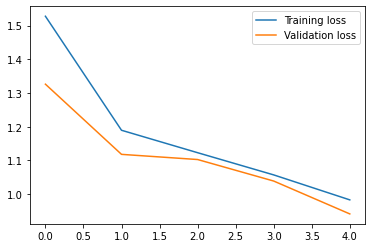

In [0]:
plt.plot(h.history['loss'],label='Training loss')
plt.plot(h.history['val_loss'],label='Validation loss')
plt.legend()

In [0]:
x,y=train_gen.next()

In [0]:
prediction=(model.predict(x))

In [0]:
k=np.argmax(prediction[50])

Text(0.5, 0, 'daisy')

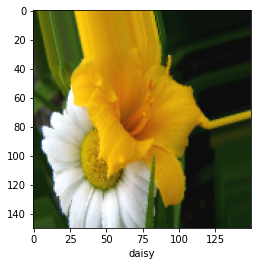

In [0]:
plt.imshow(x[50])
plt.xlabel(classes[k])